In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [2]:
%run _libraries.ipynb

In [14]:
%run _functions.ipynb

In [4]:
dir_save = 'Section5-Residuals-prediction'

# Section V. Residuals prediction

## Load Saved Section if exists

## Load Data

In [5]:
# dicts
datasets_dict = loadit(
    'datasets_dict', dir='Section3-Feature-selection-and-Preprocessing')
estimators_dict = loadit(
    'estimators_dict', dir='Section4-Linear-models-research')
features_dict = loadit(
    'features_dict', dir='Section4-Linear-models-research')
# datasets
train = datasets_dict['train'].copy()
train_cv = datasets_dict['train_cv'].copy()
# models
lr = estimators_dict['lr']
# features
features = features_dict['features'].copy()
features_linear = features_dict['features_linear'].copy()
numeric = features_dict['numeric'].copy()
categorical = features_dict['categorical'].copy()
categorical_transform = features_dict['categorical_transform'].copy()
factor = features_dict['factor'].copy()
target = 'residuals'

## Calculate Residuals

In [6]:
y_pred_lr = lr.predict(train[features_linear])

In [7]:
residuals = train['price'] - y_pred_lr

In [8]:
train['price_pred_lr'] = y_pred_lr
train['residuals'] = residuals

train_cv['price_pred_lr'] = y_pred_lr
train_cv['residuals'] = residuals

train = train.drop('price', axis=1)
train_cv = train_cv.drop('price', axis=1)

In [9]:
features.append('price_pred_lr')

## Datasets

In [10]:
train.head()

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price_pred_lr,residuals
907,908,-1.096283,0.351287,0.834375,0.460637,0.061875,0.251891,0.856818,-0.109613,0.027629,...,-0.406612,-0.133631,3.371635,-0.067806,-0.194948,-0.195938,1.086695,1.457489,12.255824,0.173392
782,783,0.207206,0.351287,0.035941,1.132222,0.061875,0.251891,3.884547,-0.109613,0.027629,...,-0.406612,-0.133631,-0.296592,-0.067806,-0.194948,-0.776119,-0.946281,-0.882843,12.313849,-0.174450
952,953,-0.574887,0.351287,-0.316076,-0.443275,0.061875,0.251891,-0.657047,-0.109613,0.027629,...,-0.406612,-0.133631,-0.296592,-0.067806,-0.194948,-0.824467,0.004627,0.136334,11.733304,0.071544
620,621,-2.399772,0.351287,-1.230620,-0.180967,0.061875,-4.640394,-0.657047,-0.109613,0.027629,...,2.459347,-0.133631,-0.296592,-0.067806,-0.194948,1.689649,1.873653,2.363424,11.171646,-0.059198
669,670,-2.399772,0.351287,0.602820,0.477350,0.061875,0.251891,-0.657047,-0.109613,0.027629,...,2.459347,-0.133631,-0.296592,-0.067806,-0.194948,1.592953,1.545754,1.985951,11.507851,0.323529


In [11]:
train_cv.head()

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price_pred_lr,residuals
907,908,50,RL,4.465908,9.350189,Pave,NA,IR1,Lvl,AllPub,...,0,0,1,0,0,19,70,70.0,12.255824,0.173392
782,783,20,RL,4.219508,9.698061,Pave,NA,IR2,Lvl,AllPub,...,0,0,0,0,0,7,8,8.0,12.313849,-0.174450
952,953,85,RL,4.110874,8.881975,Pave,NA,Reg,Lvl,AllPub,...,0,0,0,0,0,6,37,35.0,11.733304,0.071544
620,621,30,RL,3.828641,9.017847,Pave,Grvl,Reg,Lvl,AllPub,...,1,0,0,0,0,58,94,94.0,11.171646,-0.059198
669,670,30,RL,4.394449,9.358847,Pave,NA,Reg,Lvl,AllPub,...,1,0,0,0,0,56,84,84.0,11.507851,0.323529


In [12]:
datasets = [
    train[features],
    train[target]
]

datasets_cv = [
    train_cv[features],
    train_cv[target]
]

## Preprocessing Pipelines

In [13]:
encoder = OrdinalEncoder(
    encoding_method='ordered',
    variables=categorical_transform,
    missing_values='ignore',
    unseen='encode'
)

In [14]:
scaler = StandardScaler()

In [15]:
preprocessor = Pipeline([
    ('encoder', encoder),
    ('scaler', scaler),
])

In [16]:
preprocessor

Pipeline(steps=[('encoder',
                 OrdinalEncoder(missing_values='ignore', unseen='encode',
                                variables=['mszoning', 'street', 'alley',
                                           'lotshape', 'landcontour',
                                           'utilities', 'lotconfig',
                                           'landslope', 'neighborhood',
                                           'condition_first',
                                           'condition_second', 'bldgtype',
                                           'housestyle', 'roofstyle',
                                           'roofmatl', 'exterior_first',
                                           'exterior_second', 'masvnrtype',
                                           'foundation', 'heating',
                                           'centralair', 'electrical',
                                           'paveddrive', 'fence', 'miscfeature',
                                           'saletype', 'salecondition',
                                           'mssubclass'])),
                ('scaler', StandardScaler())])

In [17]:
n_folds = 20

In [18]:
params_knn = {
    'estimator__n_neighbors': [2, 3, 4, 5, 7, 10, 15],
    'estimator__weights': ['uniform']
}

In [19]:
params_svr = {
    'estimator__kernel': ['linear'],
    'estimator__C': [0.1, 1, 10],
    'estimator__gamma': [0.01, 0.1]
}

In [20]:
params_rf = {
    'estimator__n_estimators': [25, 50, 75, 100],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__random_state':[seed]
}

In [21]:
params_bag = {
    'estimator__n_estimators': [25, 50, 75, 100, 150, 200],
    'estimator__random_state':[seed]
}

In [22]:
params_lgb = {
    'estimator__n_estimators': [25, 50, 75, 100, 150, 200],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__num_leaves': [3, 25, 100, ],
    'estimator__learning_rate': [0.1, 0.3],
    'estimator__random_state':[seed],
    'estimator__verbose': [-1]
}

In [23]:
params_hgb = {
    'estimator__loss': ['squared_error'],
    'estimator__learning_rate': [0.1, 0.3],
    'estimator__max_iter': [100, 200, 300],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__random_state':[seed]
}

In [24]:
params_xgb = {
    'estimator__n_estimators': [25, 50, 75, 100, 150, 200],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__random_state':[seed],
    'estimator__learning_rate': [0.1, 0.3],
}

In [25]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', KNeighborsRegressor())
])

In [26]:
pipeline_svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', SVR())
])

In [27]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', RandomForestRegressor())
])

In [28]:
pipeline_bag = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', BaggingRegressor())
])

In [29]:
pipeline_lgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', LGBMRegressor())
])

In [30]:
pipeline_hgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', HistGradientBoostingRegressor())
])

In [31]:
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', XGBRegressor())
])

In [32]:
models_list = [
    'KNN', 'SVR', 'RF', 'Bagging',
    'LGBoost', 'HGBoost', 'XGBoost'
]

In [33]:
estimators_list = [
    pipeline_knn, pipeline_svr, pipeline_rf, pipeline_bag,
    pipeline_lgb, pipeline_hgb, pipeline_xgb
]

In [34]:
params_list = [
    params_knn, params_svr, params_rf, params_bag,
    params_lgb, params_hgb, params_xgb
]

##  Hyperparameters tuning

In [35]:
st = stopwatch.start()
results_grid, cv_dict = models_evaluation(
    X=train_cv[features],
    y=train_cv[target],
    names=models_list,
    estimators=estimators_list,
    parameters=params_list,
    n_folds=n_folds,
    full_results=True
)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 1:47:35


In [36]:
results_grid

,Model,MeanScore,StdScore,FitTime,StdFitTime,ScoreTime,StdScoreTime,HyperSearchTime,TotalTime,BestEstimator
0,SVR,-0.111886,0.020574,0.546104,0.076246,0.045274,0.012489,0:36:39,1:47:35,"((OrdinalEncoder(missing_values='ignore', unse..."
1,LGBoost,-0.112161,0.022571,0.185541,0.027413,0.052492,0.019818,0:18:33,1:47:35,"((OrdinalEncoder(missing_values='ignore', unse..."
2,HGBoost,-0.113272,0.023894,0.633549,0.146609,0.056169,0.017992,0:12:13,1:47:35,"((OrdinalEncoder(missing_values='ignore', unse..."
3,XGBoost,-0.115229,0.023480,0.748733,0.219589,0.065038,0.012606,0:18:36,1:47:35,"((OrdinalEncoder(missing_values='ignore', unse..."
4,Bagging,-0.117624,0.024256,11.163484,0.855970,0.098141,0.030449,0:11:41,1:47:35,"((OrdinalEncoder(missing_values='ignore', unse..."
5,RF,-0.118229,0.024534,3.444674,0.546458,0.057041,0.028570,0:09:32,1:47:35,"((OrdinalEncoder(missing_values='ignore', unse..."
6,KNN,-0.121090,0.024823,0.088406,0.014062,0.044025,0.005354,0:00:21,1:47:35,"((OrdinalEncoder(missing_values='ignore', unse..."


In [37]:
results_estimators = results_grid['BestEstimator'].map(lambda x: x.named_steps['estimator']).tolist()

Image 'fit_time.png' successfully saved into 'img/Section5-Residuals-prediction' directory


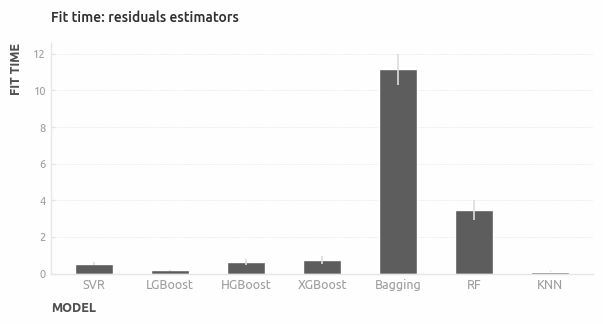

In [38]:
fig = plt.figure(figsize=(7,3))
sns.barplot(
    x=results_grid['Model'],
    y=results_grid['FitTime'],
    width=0.5,
    color=palette[0]
)
plt.errorbar(
    x=results_grid['Model'],
    y=results_grid['FitTime'],
    yerr=results_grid['StdFitTime'],
    linestyle='none',
    color=palette[-1]
)
plt.xlabel(str.upper('model'))
plt.ylabel(str.upper('fit time'))
plt.title('Fit time: residuals estimators')
plt.xticks(fontsize=9)
savefig('fit_time', dir_save)

## Features Importance

In [39]:
params_best_dict = {i:{} for i in results_grid['Model']}
for model in results_grid['Model']:
    loc = (results_grid['Model'] == model, 'BestEstimator')
    est = results_grid.loc[loc].item().named_steps['estimator']
    params_best_dict[model] = est.get_params()

In [40]:
%%capture
estimator_knn = KNeighborsRegressor(**params_best_dict['KNN'])
estimator_svr = SVR(**params_best_dict['SVR'])
estimator_rf = RandomForestRegressor(**params_best_dict['RF'])
estimator_bag = BaggingRegressor(**params_best_dict['Bagging'])
estimator_lgb = LGBMRegressor(**params_best_dict['LGBoost'])
estimator_hgb = HistGradientBoostingRegressor(**params_best_dict['HGBoost'])
estimator_xgb = XGBRegressor(**params_best_dict['XGBoost'])

In [41]:
estimators_list_best = [
    estimator_knn, estimator_svr,
    estimator_rf, estimator_bag,
    estimator_lgb, estimator_hgb, estimator_xgb
]
for est in estimators_list_best:
    est.fit(*datasets)

In [42]:
rf_importance = feature_importance_display(
    features=estimator_rf.feature_names_in_,
    importance=estimator_rf.feature_importances_,
    top=10,
    only_features=True
)
bag_importance_calc = np.mean([tree.feature_importances_ for 
                        tree in estimator_bag.estimators_], axis=0)
bag_importance = feature_importance_display(
    features=estimator_bag.feature_names_in_,
    importance=bag_importance_calc,
    top=10,
    only_features=True
)
xgb_importance = feature_importance_display(
    features=estimator_xgb.feature_names_in_,
    importance=estimator_xgb.feature_importances_,
    top=10,
    only_features=True
)

lgb_importance = feature_importance_display(
    features=estimator_lgb.feature_name_,
    importance=estimator_lgb.feature_importances_,
    top=10,
    only_features=True
)
importance_list = [rf_importance, bag_importance, lgb_importance, xgb_importance]
importance_names = list(np.array(models_list)[[2,3,4,6]])
importances = pd.concat(importance_list, keys=importance_names, axis=1)

In [43]:
importances

,RF,Bagging,LGBoost,XGBoost
0,lg_bsmtfinsf_first,lg_bsmtfinsf_first,price_pred_lr,lg_bsmtfullbath
1,neighborhood,price_pred_lr,lg_lotarea,functional
2,bedroomsize,neighborhood,lg_totalbsmtsf,neighborhood
3,price_pred_lr,bedroomsize,neighborhood,lg_bsmtfinsf_first
4,mszoning,mszoning,lg_garageyrblt,mszoning
5,functional,functional,bedroomsize,housestyle
6,salecondition,salecondition,bsmtqual,kitchenabvgr
7,lg_lotarea,lg_lotarea,lg_bsmtunfsf,fireplacequ
8,lg_openporchsf,lg_garagearea,lg_first_flrsf,yearremodadd_exst
9,lg_garagearea,lg_bsmtunfsf,modage,centralair


In [44]:
features_imp, freq = np.unique(importances.values.ravel(), return_counts=True)
features_importance_freq = pd.DataFrame({
    'Features': features_imp,
    'Frequency': freq
})
features_importance_freq = \
    features_importance_freq.sort_values('Frequency', ascending=False)
features_importance_freq.reset_index(drop=True, inplace=True)

In [45]:
features_importance_freq

,Features,Frequency
0,neighborhood,4
1,bedroomsize,3
2,price_pred_lr,3
3,functional,3
4,mszoning,3
5,lg_bsmtfinsf_first,3
6,lg_lotarea,3
7,lg_bsmtunfsf,2
8,salecondition,2
9,lg_garagearea,2


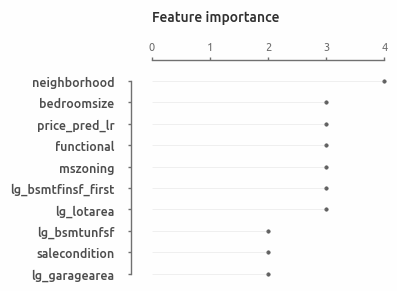

Image 'features_importance.svg' successfully saved into 'img/Section5-Residuals-prediction' directory


In [15]:
fig = plot_bar_horizontal(
    values=features_importance_freq['Frequency'][:10],
    labels=features_importance_freq['Features'][:10],
    labelsize=9,
    labelcolor='0.3',
    figsize=(3, 2.5),
    kind='lol',
    x_lim_right=4
)
savefig('features_importance', dir_save)

## Voting And Stacking estimators

In [47]:
estimator_knn = KNeighborsRegressor(**params_best_dict['KNN'])
estimator_svr = SVR(**params_best_dict['SVR'])
estimator_rf = RandomForestRegressor(**params_best_dict['RF'])
estimator_bag = BaggingRegressor(**params_best_dict['Bagging'])
estimator_lgb = LGBMRegressor(**params_best_dict['LGBoost'])
estimator_hgb = HistGradientBoostingRegressor(**params_best_dict['HGBoost'])
estimator_xgb = XGBRegressor(**params_best_dict['XGBoost'])

### Voting Regressor 

In [48]:
estimators = [
    ('SVR', estimator_svr),
    ('RF', estimator_rf),
    ('Bagging', estimator_bag),
    ('LGBoost', estimator_lgb),
    ('HGBoost', estimator_hgb),
    ('XGBoost', estimator_xgb)
]

In [49]:
estimator_vote = VotingRegressor(estimators=estimators)

In [50]:
estimator_vote

VotingRegressor(estimators=[('SVR', SVR(C=0.1, gamma=0.01, kernel='linear')),
                            ('RF',
                             RandomForestRegressor(max_depth=10,
                                                   random_state=42)),
                            ('Bagging',
                             BaggingRegressor(n_estimators=200,
                                              random_state=42)),
                            ('LGBoost',
                             LGBMRegressor(learning_rate=0.3, max_depth=2,
                                           n_estimators=200, num_leaves=3,
                                           random_state=42, verbose=-1)),
                            ('HGBoost',
                             HistGradientBoostingRegressor...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=150,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...))])

In [51]:
pipeline_vote = Pipeline(steps=[
    ('encoding', encoder),
    ('scaler', scaler),
    ('vote', estimator_vote)
])

In [52]:
st = stopwatch.start()
estimator_vote_cv = cross_validate(
    pipeline_vote, *datasets_cv, cv=n_folds,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:05:09


In [53]:
estimator_vote_scores_mean = np.mean(estimator_vote_cv['test_score'])

In [54]:
estimator_vote_scores_mean

-0.1098859772091492

In [55]:
estimator_vote_scores_std = np.std(estimator_vote_cv['test_score'], ddof=1)

In [56]:
estimator_vote_scores_std

0.02381895960787994

In [57]:
estimator_vote_fit_time_mean = np.mean(estimator_vote_cv['fit_time'])

In [58]:
estimator_vote_fit_time_mean

14.904511117935181

In [59]:
estimator_vote_fit_time_std = np.std(estimator_vote_cv['fit_time'], ddof=1)

In [60]:
estimator_vote_fit_time_std

1.5657361084668568

### Stacking Regressor

In [61]:
estimators = [
    ('SVR', estimator_svr),
    ('RF', estimator_rf),
    ('Bagging', estimator_bag),
    ('LGBoost', estimator_lgb),
    ('HGBoost', estimator_hgb),
    ('XGBoost', estimator_xgb)
]

In [62]:
final_estimator = RidgeCV()

In [63]:
estimator_stack = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

In [64]:
estimator_stack

StackingRegressor(estimators=[('SVR', SVR(C=0.1, gamma=0.01, kernel='linear')),
                              ('RF',
                               RandomForestRegressor(max_depth=10,
                                                     random_state=42)),
                              ('Bagging',
                               BaggingRegressor(n_estimators=200,
                                                random_state=42)),
                              ('LGBoost',
                               LGBMRegressor(learning_rate=0.3, max_depth=2,
                                             n_estimators=200, num_leaves=3,
                                             random_state=42, verbose=-1)),
                              ('HGBoost',
                               HistGradientBoostingRegress...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=150, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=RidgeCV())

In [65]:
pipeline_stack = Pipeline(steps=[
    ('encoding', encoder),
    ('scaler', scaler),
    ('stack', estimator_stack)
])

In [66]:
st = stopwatch.start()
estimator_stack_cv = cross_validate(
    pipeline_stack, *datasets_cv, cv=n_folds,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:26:42


In [67]:
estimator_stack_scores_mean = np.mean(estimator_stack_cv['test_score'])

In [68]:
estimator_stack_scores_mean

-0.10868283922092883

In [69]:
estimator_stack_scores_std = np.std(estimator_stack_cv['test_score'], ddof=1)

In [70]:
estimator_stack_scores_std

0.022455516311420766

In [71]:
estimator_stack_fit_time_mean = np.mean(estimator_stack_cv['fit_time'])

In [72]:
estimator_stack_fit_time_mean

79.46665509939194

In [73]:
estimator_stack_fit_time_std = np.std(estimator_stack_cv['fit_time'], ddof=1)

In [74]:
estimator_stack_fit_time_std

5.842223900303278

### Compare estimators

In [75]:
xticks = np.arange(0, len(estimator_stack_cv['test_score']), 1)
label_vote = 'Vote Regressor'
label_stack = 'Stack Regressor'

delta = estimator_stack_cv['test_score'] - estimator_vote_cv['test_score']
delta_stack = [i if i>0 else 0 for i in delta]
delta_vote = [i if i<0 else 0 for i in delta]

In [76]:
plot_vote_stack1 = pd.DataFrame(
    data=estimator_vote_cv['test_score'],
    columns=['Voting']
)
plot_vote_stack2 = pd.DataFrame(
    data=estimator_stack_cv['test_score'],
    columns=['Stacking']
)
plot_vote_stack = pd.concat([plot_vote_stack1, plot_vote_stack2], axis=1)

In [77]:
plot_vote_stack.head()

,Voting,Stacking
0,-0.162866,-0.159337
1,-0.117592,-0.119043
2,-0.101036,-0.099587
3,-0.072150,-0.076973
4,-0.132220,-0.133015


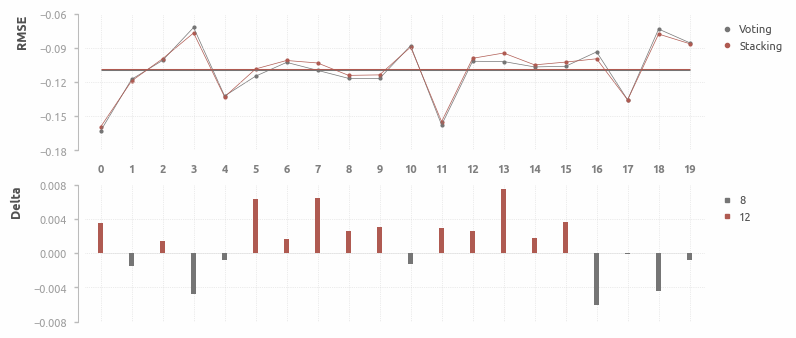

Image 'vote_stack_compare.svg' successfully saved into 'img/Section5-Residuals-prediction' directory


In [16]:
fig = plot_estimators_comparing(
    data=plot_vote_stack,
    labels=['Voting', 'Stacking'],
    ylabels=['RMSE', 'Delta'],
    figsize=(8, 4),
    width=0.15,
    palette=[alpha_color(palette[0], 0.85), palette[1]],
    ax0_y_ticks=[-0.18, -0.06, 0.03],
    ax1_y_ticks=[-0.0080, 0.0080, 0.0040]
)

savefig('vote_stack_compare', dir_save)

In [79]:
# create df with results
results_full_cols = [
    'Model', 'MeanScore', 'StdScore', 'FitTime', 'StdFitTime'
]	
results_full = results_grid[results_full_cols].copy()
results_full['MeanScore'] = results_full['MeanScore'].abs() 
results_full['Estimator'] = results_estimators 

In [80]:
# add scores of vote and stacking regressors
vote_row = [
    'Voting',
    np.abs(estimator_vote_scores_mean),
    estimator_vote_scores_std,
    estimator_vote_fit_time_mean,
    estimator_vote_fit_time_std,
    estimator_vote
]
stack_row = [
    'Stacking',
    np.abs(estimator_stack_scores_mean),
    estimator_stack_scores_std,
    estimator_stack_fit_time_mean,
    estimator_stack_fit_time_std,
    estimator_stack
]

In [81]:
results_full.loc[len(results_full)] = vote_row
results_full.loc[len(results_full)] = stack_row

results_full = results_full.sort_values('MeanScore', ascending=True)
results_full = results_full.reset_index(drop=True)

In [82]:
# calculate CI and margin of errors
results_full['CiMin'] = results_full.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['min'],
    axis=1)

results_full['CiMax'] = results_full.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['max'],
    axis=1)

results_full['MarginOfError'] = results_full.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['margin'],
    axis=1)

# move 'Estimator' column to last position
old_cols = results_full.columns
new_cols = [col for col in old_cols if col != 'Estimator'] + ['Estimator']
results_full = results_full[new_cols].copy()

In [83]:
results_full

,Model,MeanScore,StdScore,FitTime,StdFitTime,CiMin,CiMax,MarginOfError,Estimator
0,Stacking,0.108683,0.022456,79.466655,5.842224,0.098173,0.119192,0.010510,"StackingRegressor(estimators=[('SVR', SVR(C=0...."
1,Voting,0.109886,0.023819,14.904511,1.565736,0.098738,0.121034,0.011148,"VotingRegressor(estimators=[('SVR', SVR(C=0.1,..."
2,SVR,0.111886,0.020574,0.546104,0.076246,0.102257,0.121515,0.009629,"SVR(C=0.1, gamma=0.01, kernel='linear')"
3,LGBoost,0.112161,0.022571,0.185541,0.027413,0.101597,0.122724,0.010563,"LGBMRegressor(learning_rate=0.3, max_depth=2, ..."
4,HGBoost,0.113272,0.023894,0.633549,0.146609,0.102089,0.124455,0.011183,"HistGradientBoostingRegressor(max_depth=2, max..."
5,XGBoost,0.115229,0.023480,0.748733,0.219589,0.104240,0.126218,0.010989,"XGBRegressor(base_score=None, booster=None, ca..."
6,Bagging,0.117624,0.024256,11.163484,0.855970,0.106272,0.128976,0.011352,(DecisionTreeRegressor(random_state=1952926171...
7,RF,0.118229,0.024534,3.444674,0.546458,0.106747,0.129711,0.011482,"(DecisionTreeRegressor(max_depth=10, max_featu..."
8,KNN,0.121090,0.024823,0.088406,0.014062,0.109473,0.132708,0.011618,KNeighborsRegressor(n_neighbors=15)


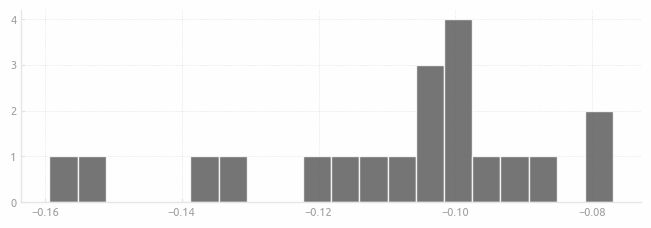

In [84]:
plt.hist(estimator_stack_cv['test_score'], bins=20, alpha=0.85);

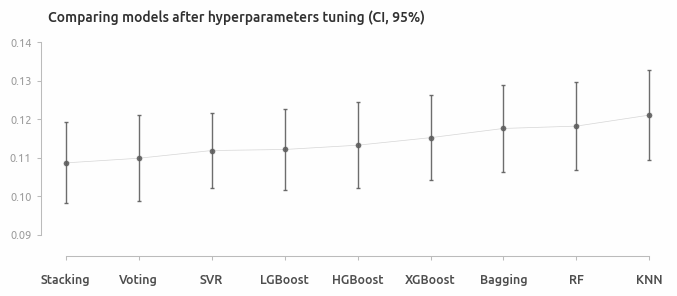

Image 'final_plot.svg' successfully saved into 'img/Section5-Residuals-prediction' directory


In [17]:
fig = plt.figure(figsize=(8, 2.5))

plt.scatter(
    x=results_full['Model'],
    y=results_full['MeanScore'],
    s=25,
    alpha=0.9
)
plt.errorbar(
    x=results_full['Model'],
    y=results_full['MeanScore'],
    yerr=results_full['MarginOfError'],
    elinewidth=1,
    capsize=1.2,
    capthick=1,
    linestyle='none',
    alpha=0.9
)
plt.plot(
    results_full['Model'], results_full['MeanScore'],
    color=palette[0], lw=0.5, alpha=0.25
)
axis_rstyle(
    offset_bottom=15,
    x_ticks=[0, 8, 1],
    y_ticks=[0.090, 0.140, 0.010],
    x_lim=[-0.25, 8.25]
    
)
plt.tick_params(axis='x', pad=10)
plt.xticks(weight='medium', fontsize=9, color='0.3')
plt.title('Comparing models after hyperparameters tuning (CI, 95%)')
plt.grid(False)
plt.show()

savefig('final_plot', dir_save)

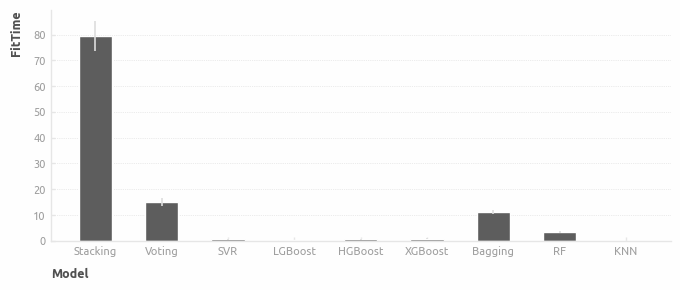

In [86]:
plt.figure(figsize=(8,3))
sns.barplot(
    x=results_full['Model'],
    y=results_full['FitTime'],
    width=0.5,
    color=palette[0]
)
plt.errorbar(
    x=results_full['Model'],
    y=results_full['FitTime'],
    yerr=results_full['StdFitTime'],
    linestyle='none',
    color=palette[-1]
)
plt.show()

### Save Data

In [87]:
estimator_stack = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

In [88]:
estimator_stack

StackingRegressor(estimators=[('SVR', SVR(C=0.1, gamma=0.01, kernel='linear')),
                              ('RF',
                               RandomForestRegressor(max_depth=10,
                                                     random_state=42)),
                              ('Bagging',
                               BaggingRegressor(n_estimators=200,
                                                random_state=42)),
                              ('LGBoost',
                               LGBMRegressor(learning_rate=0.3, max_depth=2,
                                             n_estimators=200, num_leaves=3,
                                             random_state=42, verbose=-1)),
                              ('HGBoost',
                               HistGradientBoostingRegress...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=150, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=RidgeCV())

In [89]:
estimators_dict['stack_resid'] = estimator_stack

In [90]:
saveit(estimators_dict, 'estimators_dict', dir_save)

In [91]:
saveit(results_grid, 'results_grid', dir_save)

In [92]:
saveit(results_full, 'results_full', dir_save)

### Save Session

In [18]:
save_session(dir_save)

### Execution time

In [94]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 2:19:56
